### Hariharan Kalimuthu, 2020115015
#### 19.02.2024, In Class Assignment
### Question 2 (a)

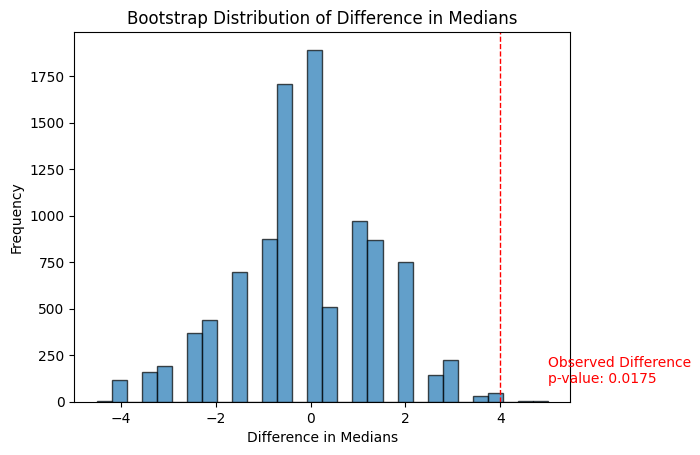

Observed Difference in Medians: 4.0
p-value: 0.0175


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming your data is already loaded into a DataFrame called df
df = pd.read_excel('data.xlsx', sheet_name=0)

group1_median = df[df['Group'] == 'Beer']['No. of Mosquitoes'].median()
group2_median = df[df['Group'] == 'Water']['No. of Mosquitoes'].median()
observed_difference = group1_median - group2_median

# Pool the data from both groups
pooled_data = df['No. of Mosquitoes'].values

# Perform permutation test
perm_diffs = []
for _ in range(10000):
    np.random.shuffle(pooled_data)
    perm_group1_median = np.median(pooled_data[:len(df[df['Group'] == 'Beer'])])
    perm_group2_median = np.median(pooled_data[len(df[df['Group'] == 'Beer']):])
    perm_diffs.append(perm_group1_median - perm_group2_median)

# Calculate p-value
p_value = np.mean(np.abs(perm_diffs) >= np.abs(observed_difference))

# Plot histogram
plt.hist(perm_diffs, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(observed_difference, color='red', linestyle='dashed', linewidth=1)
plt.xlabel('Difference in Medians')
plt.ylabel('Frequency')
plt.title('Bootstrap Distribution of Difference in Medians')
plt.text(observed_difference + 1, 100, f'Observed Difference\np-value: {p_value:.4f}', color='red')
# plot the two medians as well
plt.show()

print("Observed Difference in Medians:", observed_difference)
print("p-value:", p_value)


### Question 2 (b)

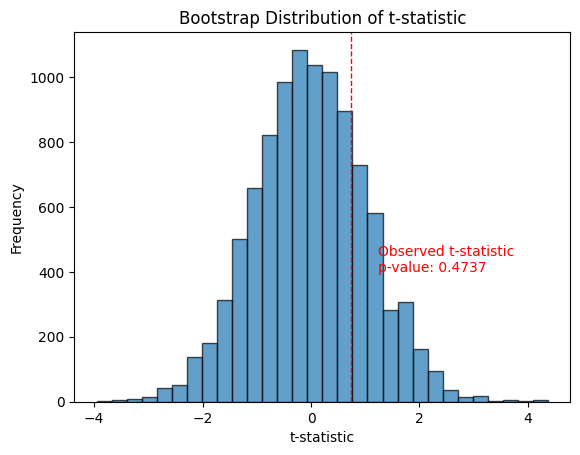

Observed t-statistic: 0.743632120058524
p-value: 0.4737


In [11]:
# Calculate the observed t-statistic
group1_data = df[df['Group'] == 'Beer']['No. of Mosquitoes']
group2_data = df[df['Group'] == 'Water']['No. of Mosquitoes']
observed_t_statistic, p_value = ttest_ind(group1_data, group2_data)

# Perform permutation test
perm_t_stats = []
for _ in range(10000):
    np.random.shuffle(pooled_data)
    perm_group1_data = pooled_data[:len(group1_data)]
    perm_group2_data = pooled_data[len(group1_data):]
    perm_t_statistic, _ = ttest_ind(perm_group1_data, perm_group2_data)
    perm_t_stats.append(perm_t_statistic)

# Calculate p-value
p_value = np.mean(np.abs(perm_t_stats) >= np.abs(observed_t_statistic))

# Plot histogram
plt.hist(perm_t_stats, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(observed_t_statistic, color='red', linestyle='dashed', linewidth=1)
plt.xlabel('t-statistic')
plt.ylabel('Frequency')
plt.title('Bootstrap Distribution of t-statistic')
plt.text(observed_t_statistic + 0.5, 400, f'Observed t-statistic\np-value: {p_value:.4f}', color='red')
plt.show()

print("Observed t-statistic:", observed_t_statistic)
print("p-value:", p_value)

### Question 2(c)

To calculate the significance values for a non-directional alternative hypothesis (suggesting that there will be a difference in groups without specifying the direction), you need to consider both tails of the distribution. This means doubling the probability obtained from the permutation test. Here's how you can adjust the code to calculate the new significance values:

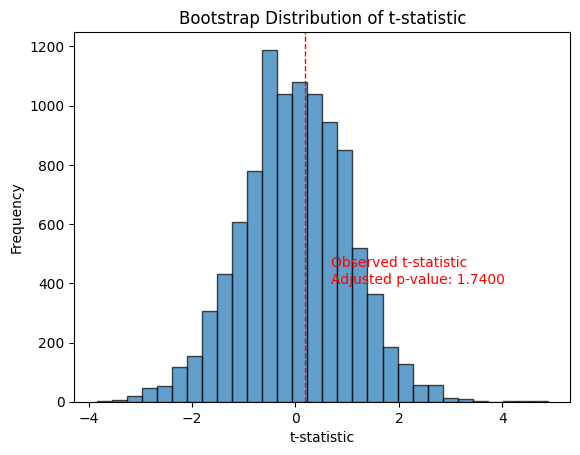

Observed t-statistic: 0.19229903954222835
Adjusted p-value: 1.74


In [12]:
# Calculate the observed t-statistic
group1_data = df[df['Group'] == 'Beer']['No. of Mosquitoes']
group2_data = df[df['Group'] == 'Water']['No. of Mosquitoes']
observed_t_statistic, p_value = ttest_ind(group1_data, group2_data)

# Perform permutation test
perm_t_stats = []
for _ in range(10000):
    np.random.shuffle(pooled_data)
    perm_group1_data = pooled_data[:len(group1_data)]
    perm_group2_data = pooled_data[len(group1_data):]
    perm_t_statistic, _ = ttest_ind(perm_group1_data, perm_group2_data)
    perm_t_stats.append(perm_t_statistic)

# Calculate p-value
p_value = np.mean(np.abs(perm_t_stats) >= np.abs(observed_t_statistic))

# Adjust p-value for non-directional hypothesis
p_value *= 2

# Plot histogram
plt.hist(perm_t_stats, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(observed_t_statistic, color='red', linestyle='dashed', linewidth=1)
plt.xlabel('t-statistic')
plt.ylabel('Frequency')
plt.title('Bootstrap Distribution of t-statistic')
plt.text(observed_t_statistic + 0.5, 400, f'Observed t-statistic\nAdjusted p-value: {p_value:.4f}', color='red')
plt.show()

print("Observed t-statistic:", observed_t_statistic)
print("Adjusted p-value:", p_value)

### Question 3

In [17]:
import numpy as np
import pandas as pd


df = pd.read_excel('data2.xlsx', sheet_name=0)

# Calculate the observed correlation coefficient
observed_corr = df['IQ'].corr(df['TestScore'])

#display first 5 rows of the dataframe
print(df.head())

# Perform permutation test
perm_corrs = []
for _ in range(10000):
    np.random.shuffle(df['TestScore'].values)
    perm_corr = df['IQ'].corr(df['TestScore'])
    perm_corrs.append(perm_corr)

# Calculate p-value
p_value = np.mean(np.abs(perm_corrs) >= np.abs(observed_corr))

print("Observed Correlation Coefficient:", observed_corr)
print("p-value:", p_value if p_value > 1e-10 else "< 1e-10")

if p_value < 0.05:
    print("Reject the null hypothesis that there exists no correlation between IQ and testscores.")
else:
    print("Accept the null hypothesis that there exists no correlation between IQ and testscores.")

    IQ  TestScore
0  111         67
1  107         43
2  100         52
3  107         66
4  114         58
Observed Correlation Coefficient: 0.4931479069133802
p-value: < 1e-10
Reject the null hypothesis that there exists no correlation between IQ and testscores.
